In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

In [2]:
sales = pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [3]:
z = np.abs(stats.zscore(sales.SalePrice))
no_outliers = sales[z < 3]

no_outliers

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


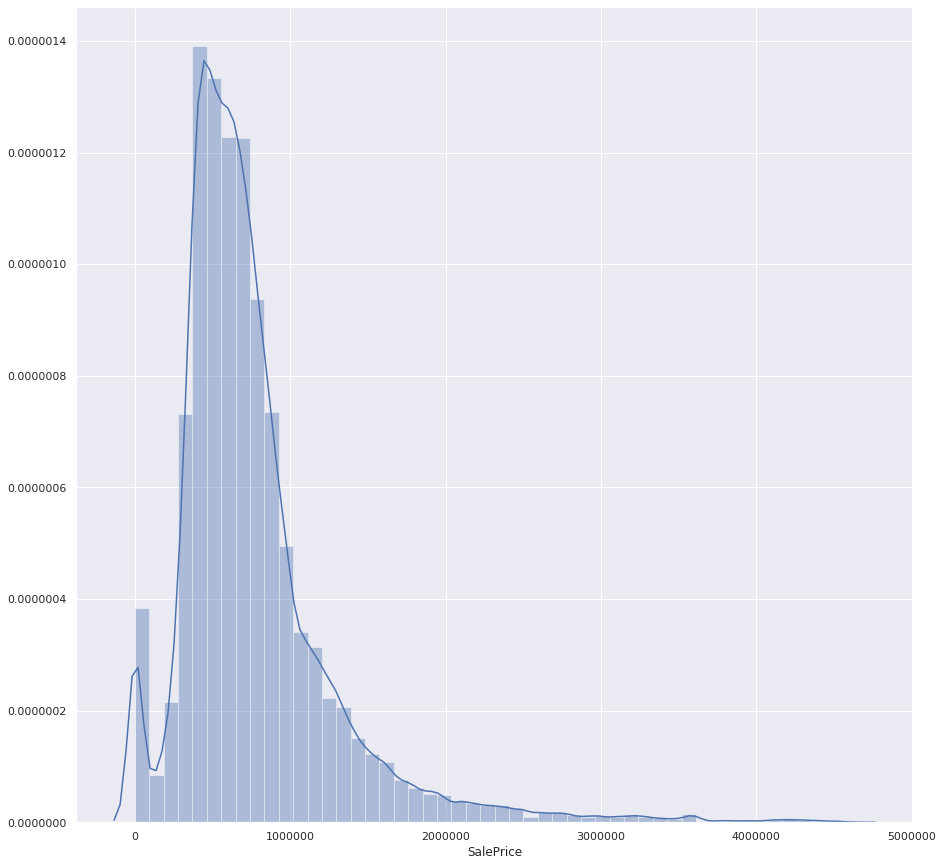

In [19]:
cor_df = pd.merge(no_outliers, res_bldg, on='PIN', how='inner', suffixes=('_sales', '_res'))

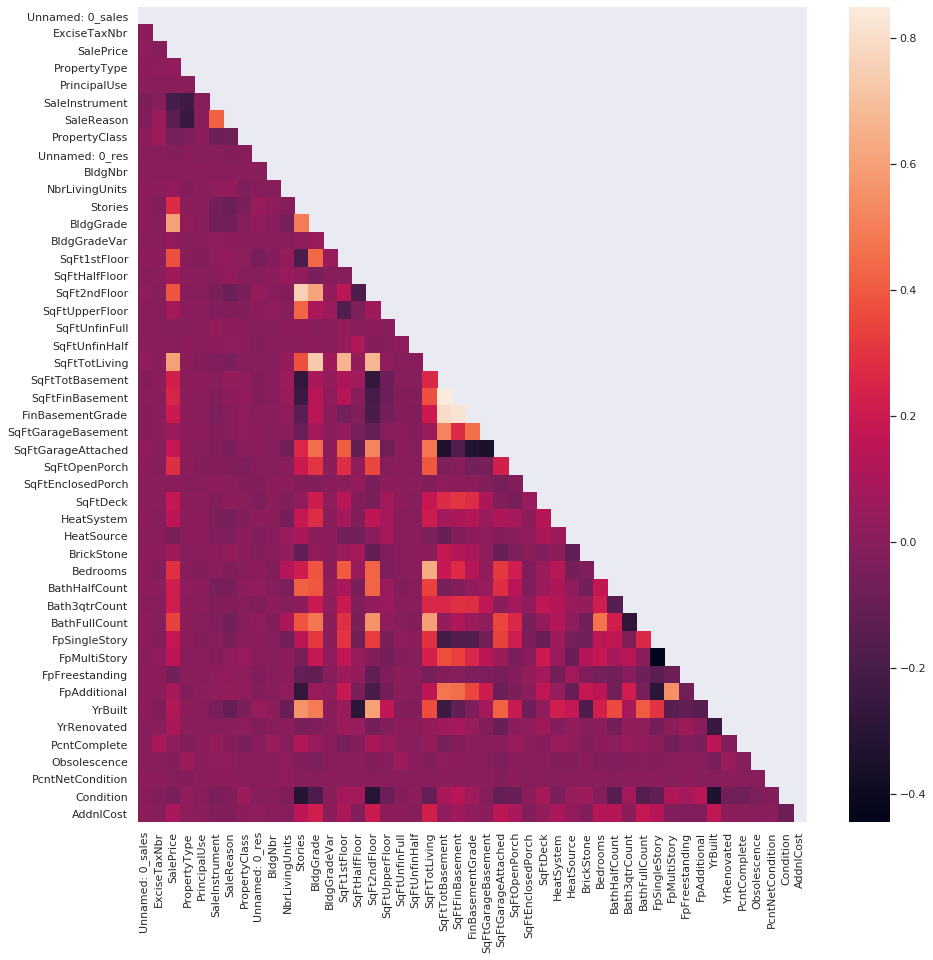

In [20]:
sns.set(rc={'figure.figsize':(15, 15)})
mask = np.triu(np.ones_like(cor_df.corr(), dtype=np.bool))
sns.heatmap(cor_df.corr(), mask=mask);
corrMatrix = cor_df.corr()

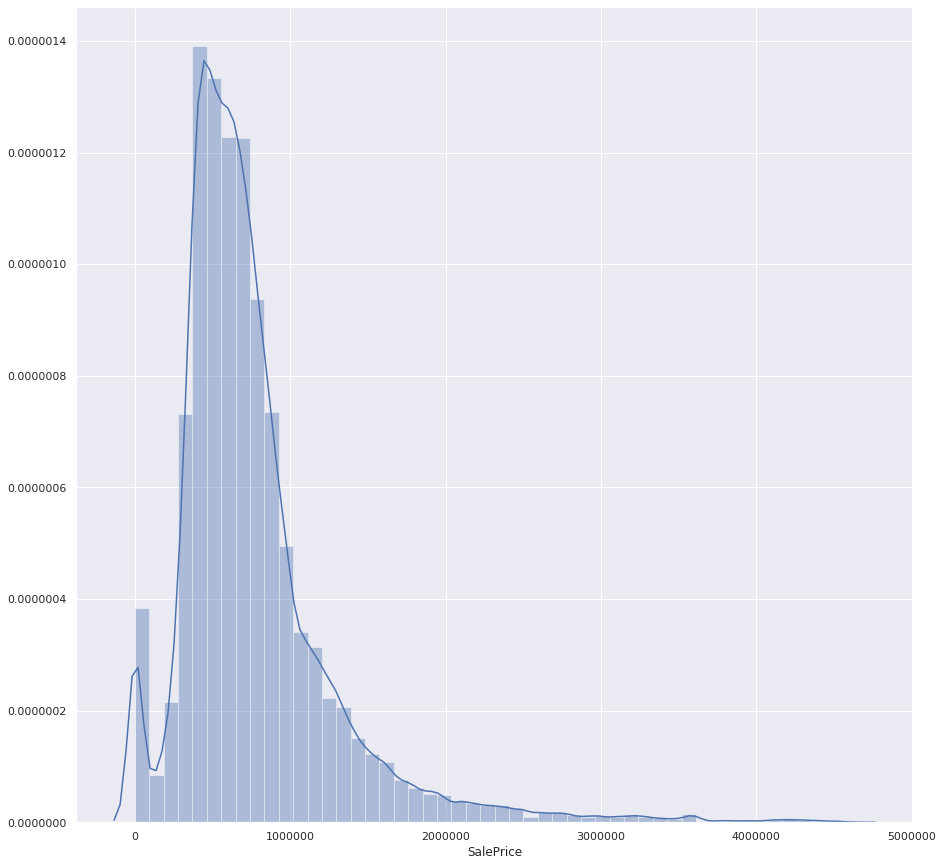

In [22]:
fsm_df = cor_df.loc[:, ['SalePrice', 'SqFtTotLiving']]
sns.distplot(fsm_df.SalePrice)

In [23]:
from src import cm_functions

In [24]:
fsm = cm_functions.get_fsm(fsm_df)

Rsquared: 0.36120458459035787
BETA values:
Intercept        57136.807501
SqFtTotLiving      324.377612
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:08:57   Log-Likelihood:            -4.2167e+05
No. Observations:               29377   AIC:                         8.433e+05
Df Residuals:                   29375   BIC:                         8.434e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P

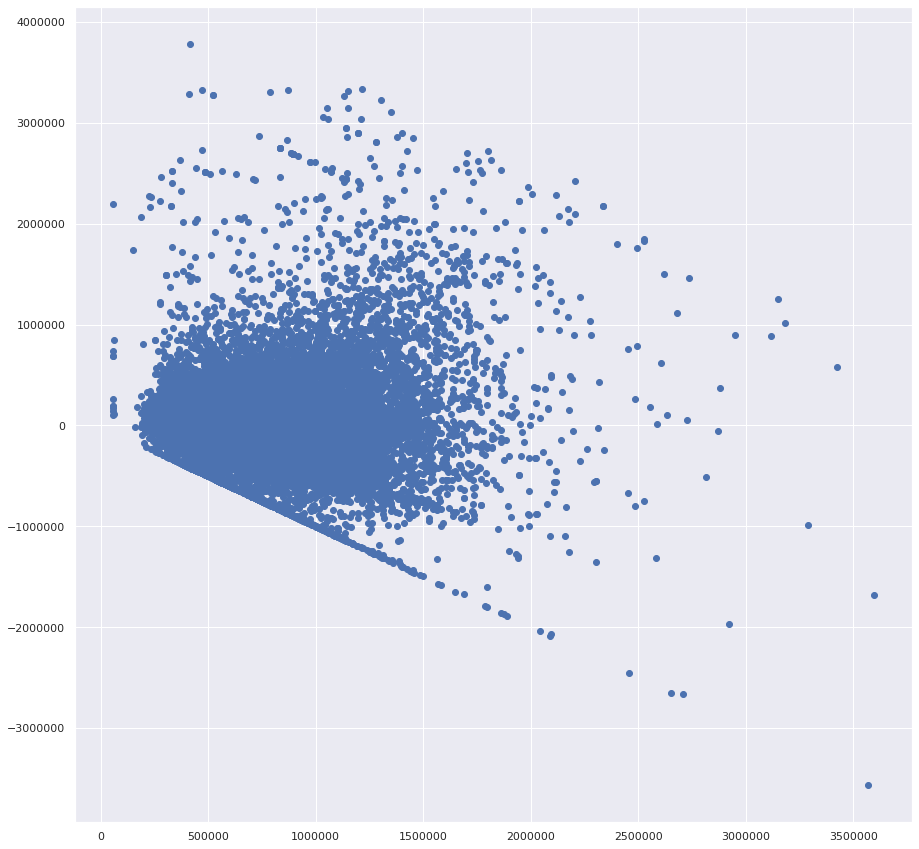

In [25]:
cm_functions.lr_homoscad(fsm)

In [26]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 0.9988592756413659
Rainbow p-value: 0.5275697326182707


(0.9988592756413659, 0.5275697326182707)

0       -123185.597989
1       -262782.590514
2         42535.371915
3       -435041.404008
4         80634.954051
             ...      
29372    213655.670941
29373    -78996.792163
29374   -113473.985951
29375    -41986.433718
29376    307495.939292
Length: 29377, dtype: float64

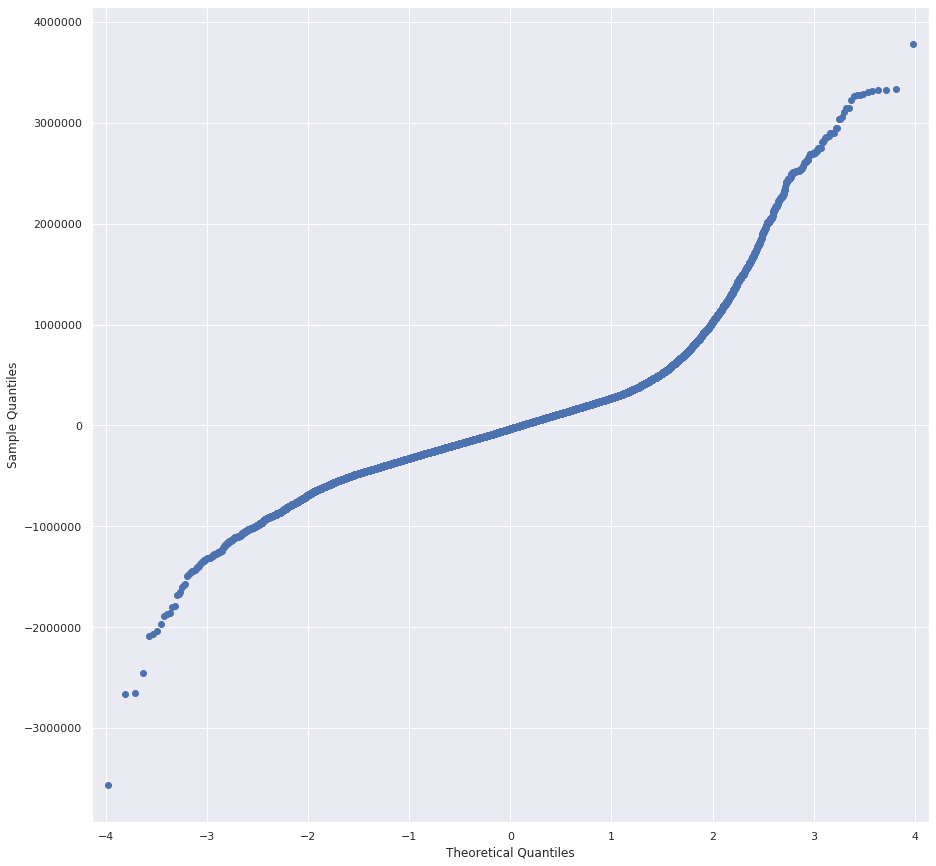

In [27]:
cm_functions.lr_normality(fsm)

# Garage

In [28]:
for column in res_bldg.columns:
    print(column)

Unnamed: 0
Major
Minor
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost
PIN


In [29]:
accessory = pd.read_csv(data_folder+'EXTR_Accessory_V_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [30]:
for column in accessory.columns:
    print(column)

Unnamed: 0
Major
Minor
AccyType
AccyDescr
Quantity
Size
Unit
Grade
EffYr
PcntNetCondition
AccyValue
DateValued
UpdatedBy
UpdateDate
PIN


In [31]:
len(accessory)

9837

In [32]:
for column in parcels.columns:
    print(column)

Unnamed: 0
Major
Minor
PropName
PlatName
PlatLot
PlatBlock
Range
Township
Section
QuarterSection
PropType
Area
SubArea
SpecArea
SpecSubArea
DistrictName
LevyCode
CurrentZoning
HBUAsIfVacant
HBUAsImproved
PresentUse
SqFtLot
WaterSystem
SewerSystem
Access
Topography
StreetSurface
RestrictiveSzShape
InadequateParking
PcntUnusable
Unbuildable
MtRainier
Olympics
Cascades
Territorial
SeattleSkyline
PugetSound
LakeWashington
LakeSammamish
SmallLakeRiverCreek
OtherView
WfntLocation
WfntFootage
WfntBank
WfntPoorQuality
WfntRestrictedAccess
WfntAccessRights
WfntProximityInfluence
TidelandShoreland
LotDepthFactor
TrafficNoise
AirportNoise
PowerLines
OtherNuisances
NbrBldgSites
Contamination
DNRLease
AdjacentGolfFairway
AdjacentGreenbelt
HistoricSite
CurrentUseDesignation
NativeGrowthProtEsmt
Easements
OtherDesignation
DeedRestrictions
DevelopmentRightsPurch
CoalMineHazard
CriticalDrainage
ErosionHazard
LandfillBuffer
HundredYrFloodPlain
SeismicHazard
LandslideHazard
SteepSlopeHazard
Stream
Wetlan

In [34]:
parcels.PIN.value_counts().sort_values()

1149600150    1
6893300350    1
5042300140    1
8731901250    1
9315500280    1
             ..
4038500060    1
2129500200    1
0579003200    1
2473371020    1
1326059046    1
Name: PIN, Length: 28594, dtype: Int64

In [36]:
cor_df.SqFtGarageAttached.describe()

count    29377.000000
mean       264.304762
std        287.355899
min          0.000000
25%          0.000000
50%        210.000000
75%        480.000000
max       3210.000000
Name: SqFtGarageAttached, dtype: float64

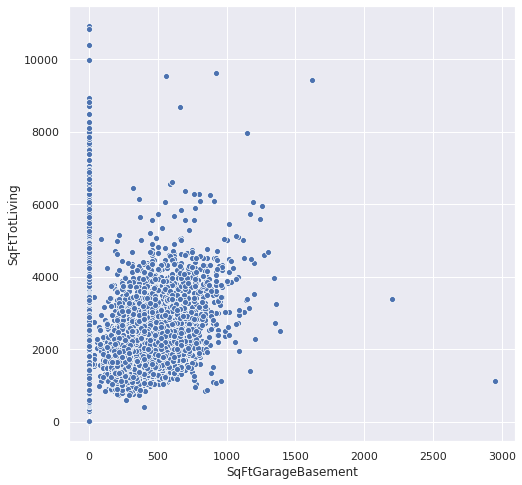

In [39]:
sns.scatterplot(cor_df.SqFtGarageBasement, cor_df.SqFtTotLiving)

In [48]:
second_model_df = cor_df.loc[:, ['SalePrice', 'SqFtTotLiving', 'SqFtGarageAttached']]

In [49]:
second_model = cm_functions.get_fsm(second_model_df)

Rsquared: 0.37660394804226305
BETA values:
Intercept             45687.534930
SqFtTotLiving           360.618116
SqFtGarageAttached     -254.655354
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     8873.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:42:54   Log-Likelihood:            -4.2131e+05
No. Observations:               29377   AIC:                         8.426e+05
Df Residuals:                   29374   BIC:                         8.427e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
        

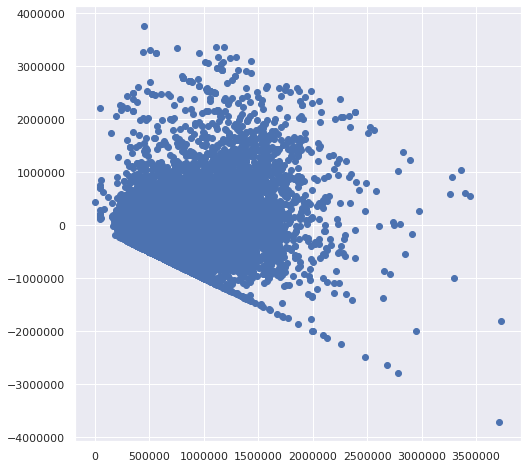

In [50]:
cm_functions.lr_homoscad(second_model)

In [51]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 0.9988592756413659
Rainbow p-value: 0.5275697326182707


(0.9988592756413659, 0.5275697326182707)

0       -123185.597989
1       -262782.590514
2         42535.371915
3       -435041.404008
4         80634.954051
             ...      
29372    213655.670941
29373    -78996.792163
29374   -113473.985951
29375    -41986.433718
29376    307495.939292
Length: 29377, dtype: float64

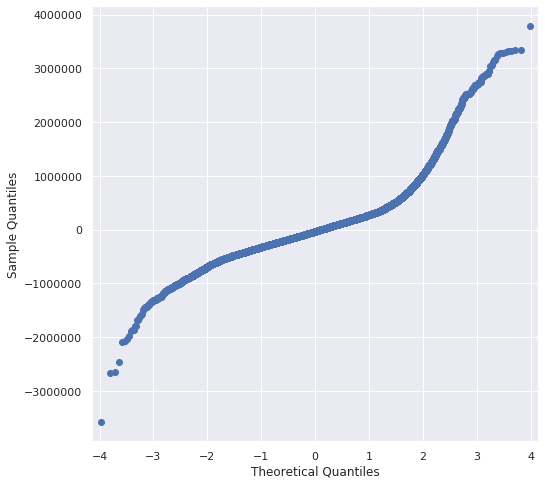

In [52]:
cm_functions.lr_normality(fsm)

In [58]:

second_model_df = cor_df.loc[:, ['SalePrice', 'SqFtTotLiving', 'SqFtGarageAttached']]

In [59]:
second_model = cm_functions.get_fsm(second_model_df)

Rsquared: 0.37660394804226305
BETA values:
Intercept             45687.534930
SqFtTotLiving           360.618116
SqFtGarageAttached     -254.655354
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     8873.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:58:36   Log-Likelihood:            -4.2131e+05
No. Observations:               29377   AIC:                         8.426e+05
Df Residuals:                   29374   BIC:                         8.427e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
        

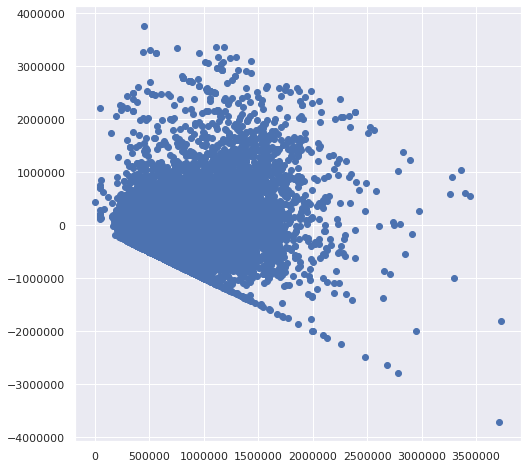

In [50]:
cm_functions.lr_homoscad(second_model)

In [51]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 0.9988592756413659
Rainbow p-value: 0.5275697326182707


(0.9988592756413659, 0.5275697326182707)

0       -123185.597989
1       -262782.590514
2         42535.371915
3       -435041.404008
4         80634.954051
             ...      
29372    213655.670941
29373    -78996.792163
29374   -113473.985951
29375    -41986.433718
29376    307495.939292
Length: 29377, dtype: float64

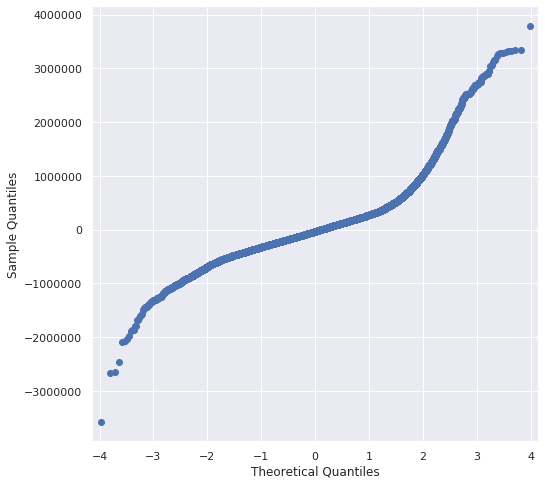

In [52]:
cm_functions.lr_normality(fsm)

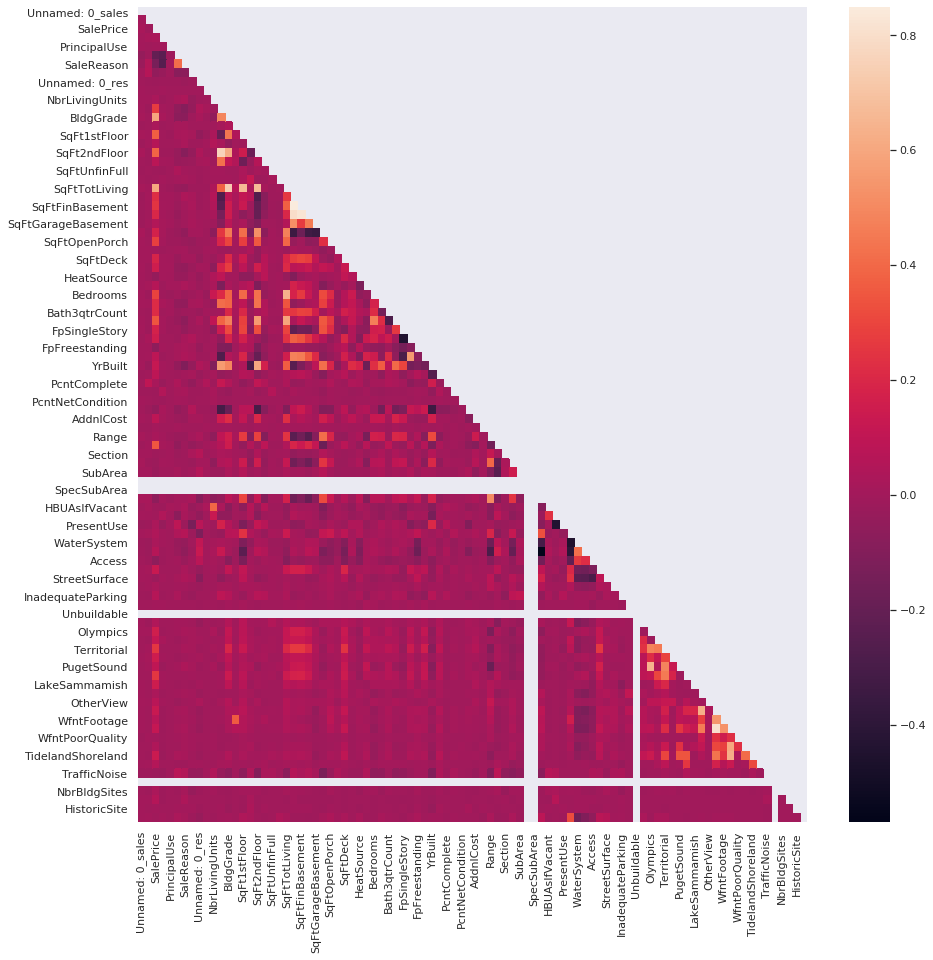

In [60]:
new_df = pd.merge(cor_df, parcels, on='PIN', how='inner', suffixes=('_sales', '_res'))

sns.set(rc={'figure.figsize':(15, 15)})
mask = np.triu(np.ones_like(new_df.corr(), dtype=np.bool))
sns.heatmap(new_df.corr(), mask=mask);
corrMatrix = new_df.corr()

In [55]:
parcels.Township.value_counts()

25    6109
24    5914
26    5232
23    4135
22    3568
21    3152
20     481
19       3
Name: Township, dtype: int64

In [56]:
parcels.Territorial.value_counts()

0    25859
2     1655
3      732
4      348
Name: Territorial, dtype: int64

In [62]:
third_model_df = new_df.loc[:, ['SalePrice', 'SqFtTotLiving', 'SqFtGarageAttached', 'Territorial']]

In [63]:
third_model = cm_functions.get_fsm(second_model_df)

Rsquared: 0.37660394804226305
BETA values:
Intercept             45687.534930
SqFtTotLiving           360.618116
SqFtGarageAttached     -254.655354
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     8873.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:00:24   Log-Likelihood:            -4.2131e+05
No. Observations:               29377   AIC:                         8.426e+05
Df Residuals:                   29374   BIC:                         8.427e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
        